In [1]:
import pandas as pd
import string
import sklearn
import numpy as np


In [2]:
# Chargement du dataset
file_path = r'C:\Users\lilyb\Downloads\archive (2)\rockyou.txt'
df = pd.read_csv(file_path, on_bad_lines='skip', encoding='latin-1', header=None)
df.columns = ["password"]

# Nettoyage des données
df_clean = df.drop_duplicates().dropna(subset=['password'])

# Définir les ensembles de caractères spéciaux
forts_special_chars = set("!@#$%^&*()")
moyens_special_chars = set("_-+=[]{}|;:'\",.<>?/")
faibles_special_chars = set("`~")

def extract_features(pwd):
    features = {
        'length': len(pwd),
        'num_upper': sum(1 for char in pwd if char.isupper()),
        'num_lower': sum(1 for char in pwd if char.islower()),
        'num_digits': sum(1 for char in pwd if char.isdigit()),
        'num_special': sum(1 for char in pwd if char in string.punctuation),
        'strength': categorize_password(pwd)
    }
    return features

def categorize_password(pwd):
    if isinstance(pwd, str):
        special_strength = special_char_strength(pwd)
        has_digit = any(char.isdigit() for char in pwd)
        has_upper = any(char.isupper() for char in pwd)

        if len(pwd) < 6:
            return 'faible'
        elif len(pwd) >= 8 and special_strength == 'fort' and has_digit and has_upper:
            return 'fort'
        else:
            return 'moyen'
    else:
        return 'invalide'

def special_char_strength(pwd):
    if any(char in forts_special_chars for char in pwd):
        return 'fort'
    elif any(char in moyens_special_chars for char in pwd):
        return 'moyen'
    elif any(char in faibles_special_chars for char in pwd):
        return 'faible'
    else:
        return 'aucun'
    

# Appliquer la fonction pour chaque mot de passe
df['strength'] = df['password'].apply(categorize_password)

# Afficher le DataFrame avec les forces
print(df)

               password strength
0                123456    moyen
1                 12345   faible
2             123456789    moyen
3              password    moyen
4              iloveyou    moyen
...                 ...      ...
14316874              1    moyen
14316875        ie168    moyen
14316876    abygurl69    moyen
14316877       a6_123    moyen
14316878  *7Â¡Vamos!     fort

[14316879 rows x 2 columns]


In [ ]:
# Extraire les caractéristiques
features = df_clean['password'].apply(extract_features)
features_df = pd.DataFrame(features.tolist())

# Convertir les labels en valeurs numériques
label_mapping = {'faible': 0, 'moyen': 1, 'fort': 2}
features_df['strength'] = features_df['strength'].map(label_mapping)

# Séparer les caractéristiques et les labels
X = features_df.drop(columns=['strength'])
y = features_df['strength']



In [5]:
from sklearn.model_selection import train_test_split

 # Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Créer un modèle
model = RandomForestClassifier(random_state=42)

In [7]:
# Entrainer  le modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import classification_report

# Évaluer le modèle
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56150
           1       1.00      1.00      1.00   2799574
           2       0.66      0.81      0.73      7581

    accuracy                           1.00   2863305
   macro avg       0.89      0.93      0.91   2863305
weighted avg       1.00      1.00      1.00   2863305



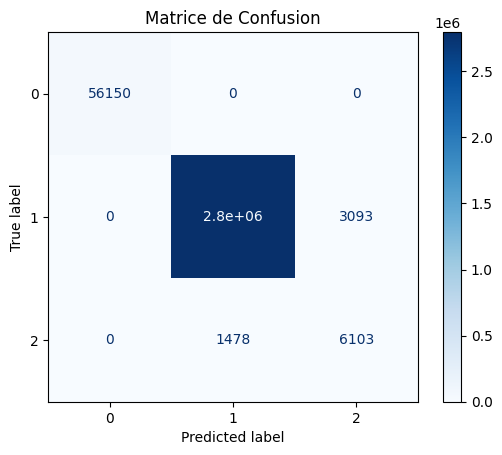

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)



In [6]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

NameError: name 'X_train' is not defined

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  56150       0       0]
 [      0 2796481    3093]
 [      0    1478    6103]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56150
           1       1.00      1.00      1.00   2799574
           2       0.66      0.81      0.73      7581

    accuracy                           1.00   2863305
   macro avg       0.89      0.93      0.91   2863305
weighted avg       1.00      1.00      1.00   2863305



In [13]:
# Définir les grilles d'hyperparamètres
n_estimators_list = [50, 100, 200]
max_depth_list = [None, 10, 20, 30]
min_samples_split_list = [2, 5, 10]








In [14]:
# Variable pour stocker les meilleurs hyperparamètres
best_accuracy = 0
best_params = {}


In [15]:
# Boucle sur les différentes combinaisons d'hyperparamètres
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for min_samples_split in min_samples_split_list:
            # Créer le modèle avec les hyperparamètres actuels
            model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)


In [16]:
from sklearn.metrics import accuracy_score

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : ", accuracy)

Précision du modèle :  0.9984035930506879


In [17]:
 # Vérifier si la précision actuelle est meilleure que la meilleure précision trouvée
if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split
                }



In [18]:
# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", best_params)

Meilleurs hyperparamètres :  {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 10}


In [19]:
# Afficher la meilleure précision
print("Meilleure précision : ", best_accuracy)

Meilleure précision :  0.9984035930506879


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
import random
from collections import defaultdict

def build_markov_model(corpus, order=2):
    """Construit un modèle de chaîne de Markov de l'ordre donné."""
    model = defaultdict(list)
    
    for word in corpus:
        for i in range(len(word) - order):
            prefix = word[i:i+order]
            suffix = word[i+order]
            model[prefix].append(suffix)
    
    return model


# Exemple de corpus de mots de passe (peut être remplacé par un corpus plus grand)
corpus = [
    'password', 'letmein', '123456', 'admin', 'welcome', 'sunshine',
    'password123', 'iloveyou', 'qwerty', '12345'
]

markov_model = build_markov_model(corpus, order=2)


In [26]:
def generate_password_with_markov(model, length=12, order=2):
    """Génère un mot de passe basé sur le modèle Markov."""
    # Choisir un préfixe de départ au hasard
    prefix = random.choice(list(model.keys()))
    password = prefix
    
# Générer les caractères restants
    for _ in range(length - order):
        suffixes = model.get(prefix, None)
        if not suffixes:
            break
        next_char = random.choice(suffixes)
        password += next_char
        prefix = password[-order:]
    
    return password

# Générer un mot de passe avec le modèle Markov
generated_password = generate_password_with_markov(markov_model, length=12)
print("Mot de passe généré avec Markov : ", generated_password)

Mot de passe généré avec Markov :  comeine


In [28]:
def is_strong_password(password):
    """Vérifie si le mot de passe est suffisamment robuste."""
    # Exclure les séquences faciles à deviner
    common_patterns = ['123', 'abc', 'password', 'qwerty', 'admin']
    for pattern in common_patterns:
        if pattern in password:
            return False
   


In [32]:
def is_secure_password(password):
    # Vérifier qu'il contient au moins une minuscule, une majuscule, un chiffre et un caractère spécial
    if (any(c.islower() for c in password) and 
        any(c.isupper() for c in password) and 
        any(c.isdigit() for c in password) and 
        any(c in string.punctuation for c in password) and 
        len(password) >= 8):  # Vérifier que le mot de passe a au moins 8 caractères
        return True
    return False


# Exemple d'utilisation
password = "P@ssw0rd!"
if is_secure_password(password):
    print("Mot de passe robuste")
else:
    print("Mot de passe non sécurisé")

Mot de passe robuste


In [36]:
import random
import spacy

# Charger le modèle de langue anglais de spaCy
nlp = spacy.load('en_core_web_sm')


In [37]:
# Liste de mots communs que l'on souhaite éviter
common_words = ["password", "123456", "qwerty", "admin", "letmein", "welcome"]

In [38]:
# Générateur de mot de passe aléatoire
def generate_password(length=12):
    all_characters = string.ascii_letters + string.digits + string.punctuation
    password = ''.join(random.choice(all_characters) for _ in range(length))
    return password

In [43]:
# Filtrer les mots de passe basés sur des mots communs ou des expressions courantes
def is_password_safe(password):
    # Vérifier si le mot de passe contient un mot commun
    for word in common_words:
        if word.lower() in password.lower():
            return False
        
# Utiliser spaCy pour détecter des mots courants dans le mot de passe
    doc = nlp(password)
    for token in doc:
        if token.text.lower() in common_words:
            return False

    return True  # Le return est bien à l'intérieur de la fonction

In [44]:
# Exemple d'utilisation
password = generate_password()
print(f"Mot de passe généré : {password}")

if is_password_safe(password):
    print("Mot de passe sécurisé")
else:
    print("Mot de passe non sécurisé - contient des mots courants")

Mot de passe généré : FiZ_I+|s"f0(
Mot de passe sécurisé


In [45]:
import bcrypt
import os
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes

In [46]:
# Générer une clé AES à partir d'un mot de passe maître sécurisé
def derive_key(master_password, salt):
    # Utilisation de bcrypt pour dériver la clé
    kdf = PBKDF2HMAC(
        algorithm=hashes.SHA256(),
        length=32,  # 256 bits
        salt=salt,
        iterations=100000,
        backend=default_backend()
    )
    key = kdf.derive(master_password.encode())
    return key

In [47]:
# Exemple d'utilisation
master_password = "mot_de_passe_maître_sécurisé"
salt = os.urandom(16)  # Générer un salt aléatoire
aes_key = derive_key(master_password, salt)
print("Clé AES générée : ", aes_key)

Clé AES générée :  b'$A\x10\xe8p\xa2\xf5\x07\x04=b\xbe\x04%\xe3\xe3\xc3\xeayes!\xd8\xa7\x86j\xfe\xa4\xf0\xd3\xca\x15'


In [56]:
from cryptography.hazmat.primitives import padding

# Chiffrement d'un mot de passe
def encrypt_password(aes_key, password):
    iv = os.urandom(16)  # Générer un IV aléatoire de 16 octets
    cipher = Cipher(algorithms.AES(aes_key), modes.CBC(iv), backend=default_backend())
    encryptor = cipher.encryptor()
    
# Appliquer du padding pour rendre la taille du mot de passe multiple de 16 octets
    padder = padding.PKCS7(128).padder()
    padded_password = padder.update(password.encode()) + padder.finalize()
    
 # Chiffrer le mot de passe
    encrypted_password = encryptor.update(padded_password) + encryptor.finalize()
    
    return iv + encrypted_password  # Le résultat est l'IV concaténé au mot de passe chiffré

# Déchiffrement d'un mot de passe
def decrypt_password(aes_key, encrypted_password):
    iv = encrypted_password[:16]  # L'IV est stocké dans les 16 premiers octets
    cipher = Cipher(algorithms.AES(aes_key), modes.CBC(iv), backend=default_backend())
    decryptor = cipher.decryptor()

    decrypted_padded_password = decryptor.update(encrypted_password[16:]) + decryptor.finalize()
    
# Supprimer le padding
    unpadder = padding.PKCS7(128).unpadder()
    decrypted_password = unpadder.update(decrypted_padded_password) + unpadder.finalize()

    return decrypted_password.decode()

# Exemple d'utilisation
password = "mot_de_passe_exemple"
encrypted = encrypt_password(aes_key, password)
print("Mot de passe chiffré : ", encrypted)

decrypted = decrypt_password(aes_key, encrypted)
print("Mot de passe déchiffré : ", decrypted)
    





Mot de passe chiffré :  b'zcW\xf8\xa2d}l\xbc#\xe1``\r]\t\x91\xe1Pv\xf6\xeb\x9a"~q\x17U\xd1\xb9B\xf2\xe1W\xba\x85(\xdf\xea\x01\xd0\xf9(\xde5\x01"\xbc'
Mot de passe déchiffré :  mot_de_passe_exemple


In [61]:
import bcrypt

# Hacher le mot de passe maître
def hash_master_password(master_password):
    salt = bcrypt.gensalt()
    hashed_password = bcrypt.hashpw(master_password.encode(), salt)
    return hashed_password

# Vérifier le mot de passe maître
def verify_master_password(master_password, hashed_password):
    return bcrypt.checkpw(master_password.encode(), hashed_password)

# Vérifier le mot de passe maître
def verify_master_password(master_password, hashed_password):
    return bcrypt.checkpw(master_password.encode(), hashed_password)

# Exemple d'utilisation
master_password = "mot_de_passe_maître_sécurisé"
hashed_password = hash_master_password(master_password)
print("Mot de passe maître haché : ", hashed_password)

# Vérification du mot de passe maître
is_valid = verify_master_password("mot_de_passe_maître_sécurisé", hashed_password)
print("Le mot de passe maître est valide : ", is_valid)



Mot de passe maître haché :  b'$2b$12$sp23Dhmm0KEEOw0jHiNgAuTMqvmt4IlQtuWql1c/WAYV651gYDQ.2'
Le mot de passe maître est valide :  True


In [67]:
import sqlite3

# Connexion à la base de données SQLite (ou création)
conn = sqlite3.connect('password_manager.db')
c = conn.cursor()

# Créer une table pour stocker les mots de passe chiffrés
c.execute('''
CREATE TABLE IF NOT EXISTS passwords (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    site TEXT NOT NULL,
    username TEXT NOT NULL,
    encrypted_password BLOB NOT NULL
)
''')

# Insérer un mot de passe chiffré dans la base de données
def store_password(site, username, encrypted_password):
    c.execute('''
    INSERT INTO passwords (site, username, encrypted_password)
    VALUES (?, ?, ?)
    ''', (site, username, encrypted_password))
    conn.commit()
    
# Récupérer un mot de passe chiffré depuis la base de données
def retrieve_password(site, username):
    c.execute('''
    SELECT encrypted_password FROM passwords WHERE site = ? AND username = ?
    ''', (site, username))
    result = c.fetchone()
    if result:
        return result[0]
    return None

# Exemple d'utilisation
store_password("example.com", "user1", encrypted)

retrieved_encrypted_password = retrieve_password("example.com", "user1")
if retrieved_encrypted_password:
    decrypted_password = decrypt_password(aes_key, retrieved_encrypted_password)
    print("Mot de passe déchiffré depuis la base de données : ", decrypted_password)
else:
    print("Password not found.")

Mot de passe déchiffré depuis la base de données :  mot_de_passe_exemple


In [73]:
import itertools
import time

# Fonction d'attaque par force brute
def brute_force_attack(hashed_password, max_length=4, chars='abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789!@#$%^&*'):
    attempts = 0
    start_time = time.time()  # Mesurer le temps de démarrage

# Générer toutes les combinaisons possibles
    for length in range(1, max_length + 1):
        for guess in itertools.product(chars, repeat=length):
            attempts += 1
            guess_password = ''.join(guess)
            # Vérifier si le mot de passe deviné correspond au hachage
            if bcrypt.checkpw(guess_password.encode(), hashed_password):
                end_time = time.time()  # Mesurer le temps de fin
                print(f'Mot de passe trouvé : {guess_password} en {attempts} essais et en {end_time - start_time:.2f} secondes')
                return guess_password
    print('Mot de passe non trouvé')
    return None

# Exemple de hachage d'un mot de passe pour test
password = 'TestPassword123!'
hashed_password = bcrypt.hashpw(password.encode(), bcrypt.gensalt())



In [80]:
import hashlib

# Fonction pour hacher le mot de passe
def hash_password(password):
    return hashlib.sha256(password.encode()).hexdigest()

# Fonction d'attaque par force brute
def brute_force_attack(target_hash, charset, max_length):
    start_time = time.time()  # Démarre le chronomètre
    attempts = 0
    
    for length in range(1, max_length + 1):
        for guess in itertools.product(charset, repeat=length):
            guess_password = ''.join(guess)
            attempts += 1
            if hash_password(guess_password) == target_hash:
                end_time = time.time()  # Arrête le chronomètre
                return guess_password, attempts, end_time - start_time
    
    return None, attempts, end_time - start_time  # Si le mot de passe n'est pas trouvé

# Fonction d'attaque par dictionnaire
def dictionary_attack(target_hash, dictionary):
    start_time = time.time()  # Démarre le chronomètre
    
    for guess in dictionary:
        if hash_password(guess) == target_hash:
            end_time = time.time()  # Arrête le chronomètre
            return guess, end_time - start_time
    
    return None, end_time - start_time  # Si le mot de passe n'est pas trouvé

# Exemple d'utilisation
if __name__ == "__main__":
    # Mot de passe à casser
    password_to_crack = "abc"
    target_hash = hash_password(password_to_crack)
    
 # Définir le charset et la longueur maximale pour l'attaque par force brute
    charset = "abc"
    max_length = 3
    
# Exécuter l'attaque par force brute
    found_password, attempts, time_taken = brute_force_attack(target_hash, charset, max_length)
    if found_password:
        print(f"Mot de passe trouvé par force brute : '{found_password}' en {attempts} tentatives, temps : {time_taken:.4f} secondes.")
    else:
        print("Mot de passe non trouvé par force brute.")
        
# Exécuter l'attaque par dictionnaire
    dictionary = ["a", "b", "c", "abc", "abcd", "abcde"]
    found_password_dict, time_taken_dict = dictionary_attack(target_hash, dictionary)
    if found_password_dict:
        print(f"Mot de passe trouvé par dictionnaire : '{found_password_dict}', temps : {time_taken_dict:.4f} secondes.")
    else:
        print("Mot de passe non trouvé par dictionnaire.")


Mot de passe trouvé par force brute : 'abc' en 18 tentatives, temps : 0.0000 secondes.
Mot de passe trouvé par dictionnaire : 'abc', temps : 0.0000 secondes.


In [85]:
!pytest -v

============================= test session starts =============================
platform win32 -- Python 3.11.9, pytest-8.3.3, pluggy-1.5.0 -- C:\Users\lilyb\Videos\security application password\env\Scripts\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\lilyb\Videos\security application password
collecting ... collected 0 items

============================ no tests ran in 0.02s ============================


In [88]:
import unittest

# Fonction d'analyse de la force du mot de passe
def analyze_password_strength(password):
    length = len(password)
    has_upper = any(c.isupper() for c in password)
    has_lower = any(c.islower() for c in password)
    has_digit = any(c.isdigit() for c in password)
    has_special = any(c in '!@#$%^&*()_+-=' for c in password)

    if length < 6:
        return 'faible'
    elif (length < 10) or (not has_upper or not has_lower or not has_digit):
        return 'moyen'
    elif has_upper and has_lower and has_digit and has_special and length >= 10:
        return 'fort'
    else:
        return 'faible'

# Ensemble de mots de passe de test (mot de passe : force attendue)
test_passwords = {
    '123456': 'faible',
    'abcdef': 'faible',
    'abcdeF1': 'moyen',
    'Abcdef1!': 'fort',
    'LongPassword123!': 'fort',
    'Short1!': 'moyen',
    'weakpass': 'faible',
    'Password!': 'moyen'
}

# Classe de test
class TestPasswordStrengthAnalysis(unittest.TestCase):
    
    def test_analyze_password_strength(self):
        for password, expected_strength in test_passwords.items():
            with self.subTest(password=password):
                self.assertEqual(analyze_password_strength(password), expected_strength)

# Exécuter les tests
if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)  # Exécuter dans le contexte Jupyter


FFFF.F.
FAIL: test_analyze_password_strength (__main__.TestPasswordStrengthAnalysis.test_analyze_password_strength) (password='123456')
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\lilyb\AppData\Local\Temp\ipykernel_6920\3539457376.py", line 38, in test_analyze_password_strength
    self.assertEqual(analyze_password_strength(password), expected_strength)
AssertionError: 'moyen' != 'faible'
- moyen
+ faible


FAIL: test_analyze_password_strength (__main__.TestPasswordStrengthAnalysis.test_analyze_password_strength) (password='abcdef')
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\lilyb\AppData\Local\Temp\ipykernel_6920\3539457376.py", line 38, in test_analyze_password_strength
    self.assertEqual(analyze_password_strength(password), expected_strength)
AssertionError: 'moyen' != 'faible'
- moyen
+ faible


FAIL: test_analyze_password_

In [89]:
import random
import string

# Fonction pour générer un mot de passe
def generate_password(length=12):
    characters = string.ascii_letters + string.digits + '!@#$%^&*()_+-='
    password = ''.join(random.choice(characters) for _ in range(length))
    return password

# Fonction pour valider la robustesse d'un mot de passe
def validate_password_strength(password):
    if len(password) < 12:
        return False, "Trop court, doit contenir au moins 12 caractères."
    if not any(c.isupper() for c in password):
        return False, "Doit contenir au moins une lettre majuscule."
    if not any(c.islower() for c in password):
        return False, "Doit contenir au moins une lettre minuscule."
    if not any(c.isdigit() for c in password):
        return False, "Doit contenir au moins un chiffre."
    if not any(c in '!@#$%^&*()_+-=' for c in password):
        return False, "Doit contenir au moins un caractère spécial."
    
    # Vérification des séquences simples
    simple_sequences = ['1234', 'abcd', 'password', 'letmein', 'qwerty']
    if any(seq in password.lower() for seq in simple_sequences):
        return False, "Contient des séquences faciles à deviner."
    
    return True, "Mot de passe robuste."

# Générer et valider des mots de passe
num_passwords = 10
results = {}

for _ in range(num_passwords):
    password = generate_password()
    is_strong, message = validate_password_strength(password)
    results[password] = message

# Afficher les résultats
for password, result in results.items():
    print(f"Mot de passe: {password} - Résultat: {result}")


Mot de passe: wwgAo%LdphVV - Résultat: Doit contenir au moins un chiffre.
Mot de passe: gL7=G+V6^#Zy - Résultat: Mot de passe robuste.
Mot de passe: y*-Iwv9-C!zy - Résultat: Mot de passe robuste.
Mot de passe: 87*UM_nGifB% - Résultat: Mot de passe robuste.
Mot de passe: OKY&M3AC^$Hk - Résultat: Mot de passe robuste.
Mot de passe: -6#3t^I_CWVm - Résultat: Mot de passe robuste.
Mot de passe: ^35*8b1v(3Iy - Résultat: Mot de passe robuste.
Mot de passe: k+x!8g^cgTnQ - Résultat: Mot de passe robuste.
Mot de passe: w*^^cP=$YtZG - Résultat: Doit contenir au moins un chiffre.
Mot de passe: vZIW+p!yl-!C - Résultat: Doit contenir au moins un chiffre.
